<h1 style="text-align: center;">TF2202 Teknik Komputasi - Akar Persamaan Nonlinear</h1>

<h2 style="text-align: center;">Fadjar Fathurrahman</h2>

# Catatan

Dokumen ini dibuat dengan menggunakan Jupyter Notebook.

Apabila Anda menerima versi HTML dari dokumen ini, maka pastikan Anda memialiki koneksi internet agar persamaan matematika yang ada dapat ditampilkan dengan baik.

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")
%matplotlib inline

In [3]:
import matplotlib
matplotlib.style.use("default")

In [113]:
import math

# Metode Bisection (bagi dua)

## Ilustrasi metode bisection (cara manual)

Ide dari metode bisection fakta bahwa jika tanda dari $f(x_{1})$ dan $f(x_{2})$ berbeda, maka setidaknya ada satu akar dari persamaan $f(x) = 0$ ada dalam selang $(x_1,x_2)$.

Misalkan kita ingin mencari akar dari fungsi berikut:

$$
f(x) = 5x^3 - 5x^2 + 6x - 2
$$

Untuk memperoleh gambaran mengenai akar dari persamaan $f(x)=0$, kita akan membuat plot dari dari $f(x)$ terlebih dahulu.

In [4]:
def func_01(x):
    return 5*x**3 - 5*x**2 + 6*x - 2

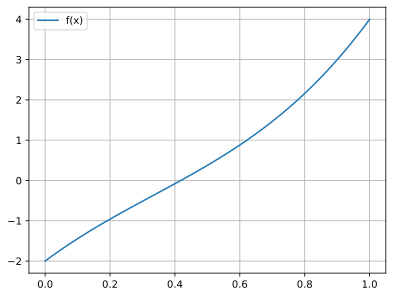

In [5]:
x = np.linspace(0,1,100)
y =  func_01(x)
plt.clf()
plt.plot(x, y, label="f(x)")
plt.legend()
plt.grid()

Dari plot di atas dapat dilihat bahwa akar dari $f(x)$ terletak di sekitar $x = 0.5$.
Sebagai ilustrasi untuk metode bisection kita akan menggunakan interval $x_1 = 0$ dan $x_2 = 1$.

Mari kita cek bahwa tanda $f(x_1)$ dan $f(x_2)$ memiliki tanda yang berbeda, atau $f(x_1)f(x_2) < 0$.

In [6]:
x1 = 0.0
x2 = 1.0
f1 = func_01(x1)
f2 = func_01(x2)
print("f1 = ", f1)
print("f2 = ", f2)
print(f1*f2 < 0)

f1 =  -2.0
f2 =  4.0
True


Fungsi `np.sign()` juga bisa digunakan untuk mengecek tanda positif atau negatif dari suatu bilangan.

In [7]:
np.sign(-2.0), np.sign(2.1)

(-1.0, 1.0)

Sekarang, kita perlu menentukan tebakan akar dari selang $x_1$ dan $x_2$. Dengan metode bisection, tebakan akar dihitung tepat berada di tengah selang yaitu:

$$
x_{r} = \frac{x_1 + x_2}{2}
$$

In [8]:
xr = 0.5*(x1 + x2)
xr

0.5

OK, sepertinya kita sudah berada dekat di akar sebenarnya. Mari kita cek nilai $f(x_r)$:

In [9]:
fxr = func_01(xr)
fxr

0.375

Ternyata nilai dari $f(x_r)$ tidak tepat pada 0. Mari buat plot $f(x)$ pada domain (interval) yang lebih sempit.

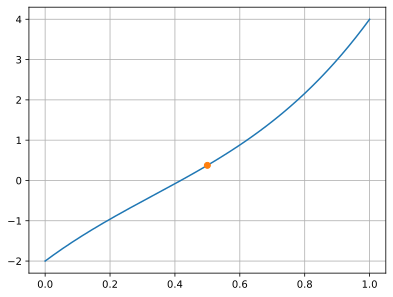

In [10]:
x = np.linspace(0.0, 1.0, 500)
y = func_01(x)
plt.clf()
plt.plot(x, y)
plt.plot(xr, fxr, marker="o") # Tandai nilai fx pada xr, yaitu (xr,fxr)
plt.grid()

Kita dapat memperbaiki tebakan akar dengan memilih rentang baru di mana kita akan mengaplikasikan lagi metode bisection. Kita sekarang memiliki 3 titik yaitu $x_1$, $x_2$, dan $x_r$, dengan nilai fungsi pada titik-titik tersebut adalah:

In [11]:
f1, f2, fxr

(-2.0, 4.0, 0.375)

Dengan informasi tersebut, kita dapat menggunakan $x_r$ sebagai pengganti dari $x_2$ karena selang ini lebih kecil dan diharapkan nilai tebakan akar dapat menjadi lebih dekat dengan akar sebenarnya.

In [12]:
x2 = xr
f2 = fxr

Cek apakah nilai fungsi pada interval baru ini berbeda tanda (hasil kali $f(x_{1})$ dan $f(x_2)$ adalah negatif.

In [13]:
print(f1*f2 < 0)

True


Kita hitung lagi tebakan akar $x_r$ sebagai nilai tengah antara $x_{1}$ dan $x_2$:

In [14]:
xr = 0.5*(x1 + x2)
fxr = func_01(xr)
fxr, xr

(-0.734375, 0.25)

Sepertinya nilai akar yang kita dapatkan masih belum baik.

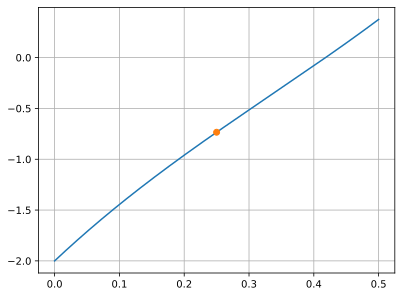

In [15]:
x = np.linspace(x1, x2, 500)
y = func_01(x)
plt.clf()
plt.plot(x, y)
plt.plot(xr, fxr, marker="o") # Tandai nilai fx pada xr, yaitu (xr,fxr)
plt.grid()

In [16]:
f1, f2, fxr

(-2.0, 0.375, -0.734375)

Kita akan melakukan kembali prosedur bisection. Untuk interval baru kita akan ganti $x_1$ dengan $x_r$.

In [17]:
x1 = xr
f1 = fxr

In [18]:
print(f1*f2 < 0)

True


Hitung kembali tebakan akar pada selang $x_1$ dan $x_2$

In [19]:
xr = 0.5*(x1 + x2)
fxr = func_01(xr)
fxr

-0.189453125

Nilai ini sudah lebih dekat dari tebakan-tebakan kita sebelumnya.

Untuk mendapatkan tebakan akar yang lebih baik kita akan lakukan sekali lagi metode bisection.

In [20]:
f1, f2, fxr

(-0.734375, 0.375, -0.189453125)

In [21]:
x1 = xr
f1 = fxr
print(f1*f2 < 0)

True


In [22]:
xr = 0.5*(x1 + x2)
fxr = func_01(xr)
fxr

0.086669921875

Tebakan ini lebih baik dari tebakan sebelumnya karena $f(x_r)$ yang diperoleh lebih dekat dengan 0. Kita dapat melakukan prosedur bisection sekali lagi.

In [23]:
f1, f2, fxr

(-0.189453125, 0.375, 0.086669921875)

In [24]:
x2 = xr
f2 = fxr

In [25]:
xr = 0.5*(x1 + x2)
fxr = func_01(xr)
fxr

-0.052459716796875

## Implementasi Python untuk metode bisection

Setelah melakukan iterasi metode bisection secara manual, sekarang kita akan membuat prosedur bisection dalam suatu subrutin (fungsi). Fungsi ini menerima masukan `f` sebagai fungsi yang akan dicari akarnya, `x1` dan `x2` sebagai input selang di mana akar akan dicari. Fungsi ini juga menggunakan `TOL` dengan nilai default `1e-10` untuk menentukan akurasi hasil yang diperoleh dengan akar sebenarnya dan juga `NiterMax` dengan nilai default `100` sebagai jumlah maksimum iterasi yang dilakukan.

In [26]:
def bisection(f, x1, x2, TOL=1e-10, NiterMax=100):
    
    f1 = f(x1)
    f2 = f(x2)
    
    if f1*f2 > 0:
        raise RuntimeError("f1 dan f2 memiliki tanda yang sama")

    for i in range(1,NiterMax+1):
        
        xr = 0.5*(x1 + x2)
        fxr = f(xr)
        
        if abs(fxr) <= TOL:
            print("Iterasi konvergen: akar ditemukan")
            return xr
        
        print("Iter = %5d, xr = %18.10f, abs(fxr) = %15.5e" % (i, xr, abs(fxr)))
    
        # f1 dan fxr berbeda tanda
        if f1*fxr < 0.0:
            x2 = xr
            f2 = fxr
        else:
            x1 = xr
            f1 = fxr
        
    print("WARNING: Konvergensi tidak diperleh setelah %d iterasi" % NiterMax)
    print("WARNING: Nilai tebakan akhir akan dikembalikan")
    return xr

## Contoh penggunaan `bisection`

Kita akan mengulangi langkah-langkah yang telah kita lakukan untuk mencari akar dari persamaan yang didefinisikan pada fungsi `func_01`. Interval awal yang kita gunakan adalah (0.0, 1.0) dan menggunakan jumlah iterasi dan syarat konvergensi default.

In [38]:
xr = bisection(func_01, 0.0, 1.0)

Iter =     1, xr =       0.5000000000, abs(fxr) =     3.75000e-01
Iter =     2, xr =       0.2500000000, abs(fxr) =     7.34375e-01
Iter =     3, xr =       0.3750000000, abs(fxr) =     1.89453e-01
Iter =     4, xr =       0.4375000000, abs(fxr) =     8.66699e-02
Iter =     5, xr =       0.4062500000, abs(fxr) =     5.24597e-02
Iter =     6, xr =       0.4218750000, abs(fxr) =     1.67809e-02
Iter =     7, xr =       0.4140625000, abs(fxr) =     1.79133e-02
Iter =     8, xr =       0.4179687500, abs(fxr) =     5.85616e-04
Iter =     9, xr =       0.4199218750, abs(fxr) =     8.09266e-03
Iter =    10, xr =       0.4189453125, abs(fxr) =     3.75230e-03
Iter =    11, xr =       0.4184570312, abs(fxr) =     1.58304e-03
Iter =    12, xr =       0.4182128906, abs(fxr) =     4.98635e-04
Iter =    13, xr =       0.4180908203, abs(fxr) =     4.35092e-05
Iter =    14, xr =       0.4181518555, abs(fxr) =     2.27558e-04
Iter =    15, xr =       0.4181213379, abs(fxr) =     9.20233e-05
Iter =    

Sama dengan sebelumnya namun menggunakan selang (0.0, 0.5), TOL=1e-9 dan jumlah iterasi maksimum 10. Pada kasus ini metode bisection belum dapat menemukan akar yang sesuai dengan TOL yang diberikan.

In [39]:
xr = bisection(func_01, 0.0, 0.5, TOL=1e-9, NiterMax=10)

Iter =     1, xr =       0.2500000000, abs(fxr) =     7.34375e-01
Iter =     2, xr =       0.3750000000, abs(fxr) =     1.89453e-01
Iter =     3, xr =       0.4375000000, abs(fxr) =     8.66699e-02
Iter =     4, xr =       0.4062500000, abs(fxr) =     5.24597e-02
Iter =     5, xr =       0.4218750000, abs(fxr) =     1.67809e-02
Iter =     6, xr =       0.4140625000, abs(fxr) =     1.79133e-02
Iter =     7, xr =       0.4179687500, abs(fxr) =     5.85616e-04
Iter =     8, xr =       0.4199218750, abs(fxr) =     8.09266e-03
Iter =     9, xr =       0.4189453125, abs(fxr) =     3.75230e-03
Iter =    10, xr =       0.4184570312, abs(fxr) =     1.58304e-03


In [40]:
xr = bisection(func_01, 0.0, 0.5, TOL=1e-9)

Iter =     1, xr =       0.2500000000, abs(fxr) =     7.34375e-01
Iter =     2, xr =       0.3750000000, abs(fxr) =     1.89453e-01
Iter =     3, xr =       0.4375000000, abs(fxr) =     8.66699e-02
Iter =     4, xr =       0.4062500000, abs(fxr) =     5.24597e-02
Iter =     5, xr =       0.4218750000, abs(fxr) =     1.67809e-02
Iter =     6, xr =       0.4140625000, abs(fxr) =     1.79133e-02
Iter =     7, xr =       0.4179687500, abs(fxr) =     5.85616e-04
Iter =     8, xr =       0.4199218750, abs(fxr) =     8.09266e-03
Iter =     9, xr =       0.4189453125, abs(fxr) =     3.75230e-03
Iter =    10, xr =       0.4184570312, abs(fxr) =     1.58304e-03
Iter =    11, xr =       0.4182128906, abs(fxr) =     4.98635e-04
Iter =    12, xr =       0.4180908203, abs(fxr) =     4.35092e-05
Iter =    13, xr =       0.4181518555, abs(fxr) =     2.27558e-04
Iter =    14, xr =       0.4181213379, abs(fxr) =     9.20233e-05
Iter =    15, xr =       0.4181060791, abs(fxr) =     2.42567e-05
Iter =    

In [41]:
xr = bisection(func_01, 0.3, 0.5, NiterMax=100)

Iter =     1, xr =       0.4000000000, abs(fxr) =     8.00000e-02
Iter =     2, xr =       0.4500000000, abs(fxr) =     1.43125e-01
Iter =     3, xr =       0.4250000000, abs(fxr) =     3.07031e-02
Iter =     4, xr =       0.4125000000, abs(fxr) =     2.48340e-02
Iter =     5, xr =       0.4187500000, abs(fxr) =     2.88452e-03
Iter =     6, xr =       0.4156250000, abs(fxr) =     1.09868e-02
Iter =     7, xr =       0.4171875000, abs(fxr) =     4.05420e-03
Iter =     8, xr =       0.4179687500, abs(fxr) =     5.85616e-04
Iter =     9, xr =       0.4183593750, abs(fxr) =     1.14926e-03
Iter =    10, xr =       0.4181640625, abs(fxr) =     2.81773e-04
Iter =    11, xr =       0.4180664063, abs(fxr) =     1.51934e-04
Iter =    12, xr =       0.4181152344, abs(fxr) =     6.49166e-05
Iter =    13, xr =       0.4180908203, abs(fxr) =     4.35092e-05
Iter =    14, xr =       0.4181030273, abs(fxr) =     1.07035e-05
Iter =    15, xr =       0.4180969238, abs(fxr) =     1.64029e-05
Iter =    

Contoh yang dengan input selang awal yang tidak memenuhi syarat bisection:

In [42]:
xr = bisection(func_01, 0.3, 0.4)

RuntimeError: f1 dan f2 memiliki tanda yang sama

## Soal 2

Sebagai contoh lain, kita akan mencari akar persamaan berikut:

$$
x^2 \left| \cos\left(\sqrt{x}\right) \right| = 5
$$

Untuk menggunakan fungsi `bisection` kita perlu mengubah persamaan tersebut dalam bentuk $f(x) = 0$:

$$
f(x) = x^2 \left| \cos\left(\sqrt{x}\right) \right| - 5 = 0
$$

In [27]:
def func_02(x):
    return x**2 * np.abs(np.cos(np.sqrt(x))) - 5

Kita perlu selang untuk tebakan awal akar. Untuk memperoleh informasi tersebut kita akan buat plot dari $f(x)$ terlebih dahulu.

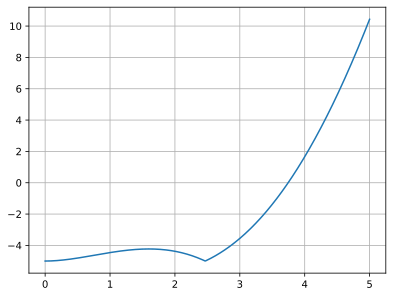

In [28]:
x = np.linspace(0,5,500)
y = func_02(x)
plt.clf()
plt.plot(x, y)
plt.grid()

Dari plot yang ditampilkan, sebuah akar terletak antara $x = 0$ dan $x = 5$. Mari kita coba selang ini sebagai tebakan awal untuk `bisection`.

In [29]:
xr = bisection(func_02, 0, 5)

Iter =     1, xr =       2.5000000000, abs(fxr) =     4.93536e+00
Iter =     2, xr =       3.7500000000, abs(fxr) =     2.87324e-02
Iter =     3, xr =       3.1250000000, abs(fxr) =     3.08887e+00
Iter =     4, xr =       3.4375000000, abs(fxr) =     1.69754e+00
Iter =     5, xr =       3.5937500000, abs(fxr) =     8.77063e-01
Iter =     6, xr =       3.6718750000, abs(fxr) =     4.34912e-01
Iter =     7, xr =       3.7109375000, abs(fxr) =     2.05785e-01
Iter =     8, xr =       3.7304687500, abs(fxr) =     8.92016e-02
Iter =     9, xr =       3.7402343750, abs(fxr) =     3.04035e-02
Iter =    10, xr =       3.7451171875, abs(fxr) =     8.77797e-04
Iter =    11, xr =       3.7475585938, abs(fxr) =     1.39167e-02
Iter =    12, xr =       3.7463378906, abs(fxr) =     6.51683e-03
Iter =    13, xr =       3.7457275391, abs(fxr) =     2.81886e-03
Iter =    14, xr =       3.7454223633, abs(fxr) =     9.70364e-04
Iter =    15, xr =       3.7452697754, abs(fxr) =     4.62426e-05
Iter =    

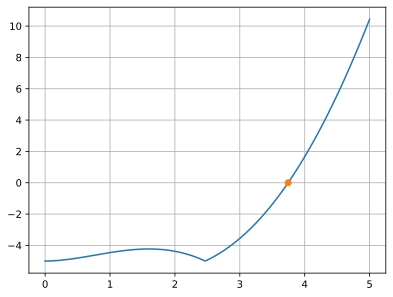

In [30]:
x = np.linspace(0,5,500)
y = func_02(x)
plt.clf()
plt.plot(x, y)
plt.plot(xr, func_02(xr), marker="o")
plt.grid()

Sekarang mari kita coba gunakan selang $x = 3$ dan $x = 4$.

In [31]:
xr = bisection(func_02, 3, 4)

Iter =     1, xr =       3.5000000000, abs(fxr) =     1.37950e+00
Iter =     2, xr =       3.7500000000, abs(fxr) =     2.87324e-02
Iter =     3, xr =       3.6250000000, abs(fxr) =     7.02772e-01
Iter =     4, xr =       3.6875000000, abs(fxr) =     3.43907e-01
Iter =     5, xr =       3.7187500000, abs(fxr) =     1.59314e-01
Iter =     6, xr =       3.7343750000, abs(fxr) =     6.57229e-02
Iter =     7, xr =       3.7421875000, abs(fxr) =     1.86034e-02
Iter =     8, xr =       3.7460937500, abs(fxr) =     5.03748e-03
Iter =     9, xr =       3.7441406250, abs(fxr) =     6.78970e-03
Iter =    10, xr =       3.7451171875, abs(fxr) =     8.77797e-04
Iter =    11, xr =       3.7456054688, abs(fxr) =     2.07942e-03
Iter =    12, xr =       3.7453613281, abs(fxr) =     6.00706e-04
Iter =    13, xr =       3.7452392578, abs(fxr) =     1.38572e-04
Iter =    14, xr =       3.7453002930, abs(fxr) =     2.31060e-04
Iter =    15, xr =       3.7452697754, abs(fxr) =     4.62426e-05
Iter =    

# Metode Regula-Falsi

Metode regula-falsi mirip dengan metode bisection, namun dengan persamaan yang berbeda untuk menentukan aproksimasi akar. Pada metode bisection, tebakan akar diberikan sebagai nilai tengah dari $x_1$ dan $x_2$ sedangkan pada metode regula-falsi digunakan interpolasi linear
antara $f(x_1)$ dan $f(x_2)$. Tebakan akar adalah perpotongan antara garis interpolasi linear ini dengan sumbu $x$. Hasil akhirnya adalah:

$$
x_r = x_2 - \frac{f(x_2)}{f(x_1) - f(x_2)}(x_1 - x_2)
$$

## Implementasi Python  untuk metode regula falsi

Implementasi Python berikut ini sangat mirip dengan `bisection`.

In [32]:
def regula_falsi(f, x1, x2, TOL=1e-10, NiterMax=100):
    
    f1 = f(x1)
    f2 = f(x2)
    
    if f1*f2 > 0:
        raise RuntimeError("f1 dan f2 memiliki tanda yang sama")
        
    for i in range(1,NiterMax+1):
        
        xr = x2 - f2*(x1 - x2)/(f1 - f2)
        fxr = f(xr)
        
        if abs(fxr) <= TOL:
            print("Iterasi konvergen: akar ditemukan")
            return xr
        
        print("Iter = %5d, xr = %18.10f, abs(fxr) = %15.5e" % (i, xr, abs(fxr)))
    
        # f1 dan fxr berbeda tanda
        if f1*fxr < 0.0:
            x2 = xr
            f2 = fxr
        else:
            x1 = xr
            f1 = fxr
        
    print("WARNING: Konvergensi tidak diperleh setelah %d iterasi" % NiterMax)
    print("WARNING: Nilai tebakan akhir akan dikembalikan")
    return xr

## Contoh penggunaan `regula_falsi`

Mari kita gunakan `regula_falsi` untuk dua fungsi yang telah kita coba sebelumnya, yaitu `func_01` dan `func_02`:

In [33]:
xr = regula_falsi(func_01, 0.0, 1.0)

Iter =     1, xr =       0.3333333333, abs(fxr) =     3.70370e-01
Iter =     2, xr =       0.3898305085, abs(fxr) =     1.24648e-01
Iter =     3, xr =       0.4082699418, abs(fxr) =     4.35410e-02
Iter =     4, xr =       0.4146417183, abs(fxr) =     1.53464e-02
Iter =     5, xr =       0.4168789156, abs(fxr) =     5.42383e-03
Iter =     6, xr =       0.4176685323, abs(fxr) =     1.91870e-03
Iter =     7, xr =       0.4179477285, abs(fxr) =     6.78967e-04
Iter =     8, xr =       0.4180465103, abs(fxr) =     2.40291e-04
Iter =     9, xr =       0.4180814678, abs(fxr) =     8.50444e-05
Iter =    10, xr =       0.4180938398, abs(fxr) =     3.00995e-05
Iter =    11, xr =       0.4180982185, abs(fxr) =     1.06531e-05
Iter =    12, xr =       0.4180997683, abs(fxr) =     3.77043e-06
Iter =    13, xr =       0.4181003168, abs(fxr) =     1.33446e-06
Iter =    14, xr =       0.4181005109, abs(fxr) =     4.72306e-07
Iter =    15, xr =       0.4181005796, abs(fxr) =     1.67163e-07
Iter =    

In [34]:
xr = regula_falsi(func_02, 3, 4)

Iter =     1, xr =       3.6819027315, abs(fxr) =     3.76606e-01
Iter =     2, xr =       3.7407725061, abs(fxr) =     2.71536e-02
Iter =     3, xr =       3.7449486892, abs(fxr) =     1.89809e-03
Iter =     4, xr =       3.7452402785, abs(fxr) =     1.32391e-04
Iter =     5, xr =       3.7452606151, abs(fxr) =     9.23275e-06
Iter =     6, xr =       3.7452620333, abs(fxr) =     6.43873e-07
Iter =     7, xr =       3.7452621322, abs(fxr) =     4.49024e-08
Iter =     8, xr =       3.7452621391, abs(fxr) =     3.13140e-09
Iter =     9, xr =       3.7452621396, abs(fxr) =     2.18379e-10
Iterasi konvergen: akar ditemukan


# Metode fixed-point

Pada metode ini, persamaan $f(x)$ yang ingin kita cari akarnya diubah menjadi $x = g(x)$. Contoh: untuk mencari akar dari persamaan $f(x) = e^{-x} - x = 0$ kita mengubah persamaan tersebut menjadi $x = g(x) = e^{-x}$.

Iterasi dimulai dengan suatu tebakan awal $x_0$. Nilai tebakan akar berikutnya dihitung dengan persamaan

$$
x_{i+1} = g(x_{i})
$$

Jika iterasi ini konvergen, maka $x_{i+1}$ adalah akar dari persamaan $f(x) = 0$.

Perhatikan bahwa metode ini tidak selalu konvergen.

Pada contoh berikut ini kita akan mencari akar dari persamaan $f(x) = e^{-x} - x = 0$. Persamaan ini kita ubah menjadi terlebih dahulu menjadi $x = g(x) = e^{-x}$.

In [35]:
# definisi fungsi g(x) = exp(-x)
def func_03(x):
    return np.exp(-x)

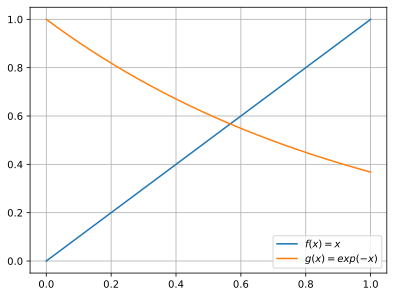

In [36]:
plt.clf()
x = np.linspace(0,1,500)
plt.plot(x, x, label="$f(x) = x$")
plt.plot(x, func_03(x), label="$g(x) = exp(-x)$")
plt.legend()
plt.grid()

Akar yang ingin kita cari adalah perpotongan kurva $g(x) = e^{-x}$ dengan $f(x) = x$.

## Implementasi Python untuk metode fixed point

Berikut ini adalah implementasi sederhana dari metode fixed point dengan menggunakan Python. Perhatikan bahwa metode ini menerima fungsi $x = g(x)$ dan satu nilai tebakan akar.

In [37]:
def fixed_point(g, x, TOL=1e-10, NiterMax=100):
    
    for i in range(1,NiterMax+1):
        gx = g(x)
        print("Iter = %5d, x = %18.10f, g(x) = %18.10f abs(x-g(x)) %15.5e" % (i, x, g(x), abs(x-gx)))
        if abs(x - gx) <= TOL:
            print("Iterasi konvergen: akar ditemukan")
            return x
        x = gx
    
    print("WARNING: Konvergensi tidak diperleh setelah %d iterasi" % NiterMax)
    print("WARNING: Nilai tebakan akhir akan dikembalikan")
    return x

## Contoh penggunaan `fixed_point`

Mari kita gunakan `fixed_point` untuk mencari akar dari persamaan $x = e^{-x}$.

In [38]:
x0 = 0.0
xr = fixed_point(func_03, x0)

Iter =     1, x =       0.0000000000, g(x) =       1.0000000000 abs(x-g(x))     1.00000e+00
Iter =     2, x =       1.0000000000, g(x) =       0.3678794412 abs(x-g(x))     6.32121e-01
Iter =     3, x =       0.3678794412, g(x) =       0.6922006276 abs(x-g(x))     3.24321e-01
Iter =     4, x =       0.6922006276, g(x) =       0.5004735006 abs(x-g(x))     1.91727e-01
Iter =     5, x =       0.5004735006, g(x) =       0.6062435351 abs(x-g(x))     1.05770e-01
Iter =     6, x =       0.6062435351, g(x) =       0.5453957860 abs(x-g(x))     6.08477e-02
Iter =     7, x =       0.5453957860, g(x) =       0.5796123355 abs(x-g(x))     3.42165e-02
Iter =     8, x =       0.5796123355, g(x) =       0.5601154614 abs(x-g(x))     1.94969e-02
Iter =     9, x =       0.5601154614, g(x) =       0.5711431151 abs(x-g(x))     1.10277e-02
Iter =    10, x =       0.5711431151, g(x) =       0.5648793474 abs(x-g(x))     6.26377e-03
Iter =    11, x =       0.5648793474, g(x) =       0.5684287250 abs(x-g(x))     

Plot lokasi akar.

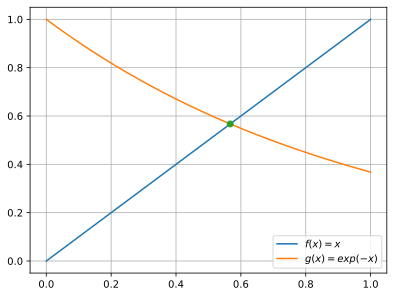

In [39]:
plt.clf()
x = np.linspace(0,1,500)
plt.plot(x, x, label="$f(x) = x$")
plt.plot(x, func_03(x), label="$g(x) = exp(-x)$")
plt.plot(xr, func_03(xr), marker="o")
plt.legend()
plt.grid()

Mari kita gunakan nilai tebakan awal yang berbeda:

In [40]:
x0 = 1.0
xr = fixed_point(func_03, x0)

Iter =     1, x =       1.0000000000, g(x) =       0.3678794412 abs(x-g(x))     6.32121e-01
Iter =     2, x =       0.3678794412, g(x) =       0.6922006276 abs(x-g(x))     3.24321e-01
Iter =     3, x =       0.6922006276, g(x) =       0.5004735006 abs(x-g(x))     1.91727e-01
Iter =     4, x =       0.5004735006, g(x) =       0.6062435351 abs(x-g(x))     1.05770e-01
Iter =     5, x =       0.6062435351, g(x) =       0.5453957860 abs(x-g(x))     6.08477e-02
Iter =     6, x =       0.5453957860, g(x) =       0.5796123355 abs(x-g(x))     3.42165e-02
Iter =     7, x =       0.5796123355, g(x) =       0.5601154614 abs(x-g(x))     1.94969e-02
Iter =     8, x =       0.5601154614, g(x) =       0.5711431151 abs(x-g(x))     1.10277e-02
Iter =     9, x =       0.5711431151, g(x) =       0.5648793474 abs(x-g(x))     6.26377e-03
Iter =    10, x =       0.5648793474, g(x) =       0.5684287250 abs(x-g(x))     3.54938e-03
Iter =    11, x =       0.5684287250, g(x) =       0.5664147331 abs(x-g(x))     

In [41]:
x0 = -10.0
xr = fixed_point(func_03, x0)

Iter =     1, x =     -10.0000000000, g(x) =   22026.4657948067 abs(x-g(x))     2.20365e+04
Iter =     2, x =   22026.4657948067, g(x) =       0.0000000000 abs(x-g(x))     2.20265e+04
Iter =     3, x =       0.0000000000, g(x) =       1.0000000000 abs(x-g(x))     1.00000e+00
Iter =     4, x =       1.0000000000, g(x) =       0.3678794412 abs(x-g(x))     6.32121e-01
Iter =     5, x =       0.3678794412, g(x) =       0.6922006276 abs(x-g(x))     3.24321e-01
Iter =     6, x =       0.6922006276, g(x) =       0.5004735006 abs(x-g(x))     1.91727e-01
Iter =     7, x =       0.5004735006, g(x) =       0.6062435351 abs(x-g(x))     1.05770e-01
Iter =     8, x =       0.6062435351, g(x) =       0.5453957860 abs(x-g(x))     6.08477e-02
Iter =     9, x =       0.5453957860, g(x) =       0.5796123355 abs(x-g(x))     3.42165e-02
Iter =    10, x =       0.5796123355, g(x) =       0.5601154614 abs(x-g(x))     1.94969e-02
Iter =    11, x =       0.5601154614, g(x) =       0.5711431151 abs(x-g(x))     

# Metode Newton-Raphson

Metode Newton-Raphson adalah salah satu metode paling populer yang digunakan untuk mencari akar persamaan nonlinear. Metode ini memerlukan informasi tebakan awal akar dan turunan pertama dari fungsi yang akan dicari akarnya.

Metode Newton-Rapshon dapat diturunkan dari deret Taylor untuk $f(x)$ disekitar $x$:

$$
f(x_{i+1}) = f(x_{i}) +
f'(x_{i})(x_{i+1} - x_{i}) +
\mathcal{O}(x_{i+1} - x_{i})^2
$$

Jika $x_{i+1}$ adalah akar dari $f(x)=0$ maka diperoleh:

$$
0 = f(x_{i}) +
f'(x_{i})(x_{i+1} - x_{i}) +
\mathcal{O}(x_{i+1} - x_{i})^2
$$

Dengan mengasumsikan $x_{i}$ dekat dengan $x_{i+1}$, suku $\mathcal{O}(x_{i+1} - x_{i})$ dapat dianggap nol sehingga diperoleh:

$$
x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}
$$

Sebagai contoh, kita akan menghitung akar dari persamaan $f(x) = x^3 - 35$. Kita juga perlu mendefinisikan turunan dari $f(x)$ yaitu $f'(x) = 3x^{2}$.

In [42]:
def func_04(x):
    return x**3 - 35.0

def dfunc_04(x):
    return 3*x**2

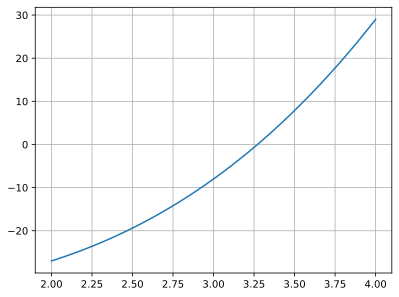

In [43]:
plt.clf()
x = np.linspace(2,4,500)
plt.plot(x, func_04(x))
plt.grid()

Coba dengan tebakan awal $x_{0} = 2.0$:

In [75]:
x = 2.0
fx = func_04(x)
dfx = dfunc_04(x)
x, fx, dfx

(2.0, -27.0, 12.0)

Tebakan akar menurut metode Newton-Raphson:

In [76]:
xr = x - fx/dfx
xr

4.25

Mari kita lihat nilai dari fungsi pada tebakan akar ini.

In [77]:
func_04(xr)

41.765625

Nilai ini masih jauh dari 0. Kita akan lakukan lagi prosedur Newton-Raphson dengan menggunakan `xr` sebagai tebakan akar.

In [78]:
x = xr
fx = func_04(x)
dfx = dfunc_04(x)
x, fx, dfx

(4.25, 41.765625, 54.1875)

Tebakan akar selannjutnya menurut metode Newton-Raphson adalah:

In [79]:
xr = x - fx/dfx
xr

3.4792387543252596

In [80]:
func_04(xr)

7.116541080628295

Nilainya masih jauh dari 0 namun sudah lebih baik dari tebakan sebelumnya. Kita akan lakukan prosedur Newton-Raphson lagi:

In [81]:
x = xr
fx = func_04(x)
dfx = dfunc_04(x)
x, fx, dfx

(3.4792387543252596, 7.116541080628295, 36.31530692879635)

In [82]:
xr = x - fx/dfx
xr

3.283273425033627

In [83]:
func_04(xr)

0.3933079213857553

Nilai dari `func_04` semakin mendekati 0 sehingga kita makin mendekati akar yang diinginkan. Kita lakukan prosedur Newton-Raphson lagi:

In [84]:
x = xr
fx = func_04(x)
dfx = dfunc_04(x)
x, fx, dfx

(3.283273425033627, 0.3933079213857553, 32.33965315059613)

In [85]:
xr = x - fx/dfx
xr

3.2711116396380246

In [86]:
func_04(xr)

0.0014550784657387794

Nilai ini sudah jauh lebih baik dari sebelumnya. Kita dapat mengulangi prosedur ini sampai suatu nilai toleransi tertentu.

Perhatikan bahwa metode Newton-Raphson tidak bisa digunakan apabila nilai turunan suatu fungsi bernilai 0.

## Implementasi Python untuk metode Newton-Raphson

Fungsi `newton_raphson` membutuhkan fungsi `f` dan turunannya yaitu `df` beserta satu nilai tebakan awal `x`. Fungsi `newton_raphson` akan mengecek apakah turunan dari `f` bernilai sangat kecil disekitar `x`.

In [49]:
def newton_raphson(f, df, x, TOL=1e-10, NiterMax=100):
    
    SMALL = np.finfo(float).eps
    
    for i in range(1,NiterMax+1):
        fx = f(x)
        dfx = df(x)
        
        if abs(dfx) <= SMALL:
            raise RuntimeError("Turunan f(x) sangat kecil")
            
        xr = x - fx/dfx
        
        print("Iter = %5d, x = %18.10f, abs(f(x)) %15.5e" % (i, x, abs(fx)))
        if abs(fx) <= TOL:
            print("Iterasi konvergen: akar ditemukan")
            return x
        
        x = xr
    
    print("WARNING: Konvergensi tidak diperleh setelah %d iterasi" % NiterMax)
    print("WARNING: Nilai tebakan akhir akan dikembalikan")
    return x

Kita akan coba mencari akar persamaan `func_04` dengan beberapa tebakan awal.

In [50]:
x0 = 3.0
xr = newton_raphson(func_04, dfunc_04, x0)

Iter =     1, x =       3.0000000000, abs(f(x))     8.00000e+00
Iter =     2, x =       3.2962962963, abs(f(x))     8.16136e-01
Iter =     3, x =       3.2712589288, abs(f(x))     6.18335e-03
Iter =     4, x =       3.2710663215, abs(f(x))     3.64060e-07
Iter =     5, x =       3.2710663102, abs(f(x))     0.00000e+00
Iterasi konvergen: akar ditemukan


In [59]:
x0 = 4.0
xr = newton_raphson(func_04, dfunc_04, x0)

Iter =     1, x =       4.0000000000, abs(f(x))     2.90000e+01
Iter =     2, x =       3.3958333333, abs(f(x))     4.15968e+00
Iter =     3, x =       3.2755942598, abs(f(x))     1.45547e-01
Iter =     4, x =       3.2710725664, abs(f(x))     2.00823e-04
Iter =     5, x =       3.2710663102, abs(f(x))     3.84091e-10
Iter =     6, x =       3.2710663102, abs(f(x))     0.00000e+00
Iterasi konvergen: akar ditemukan


In [60]:
x0 = 10.0
xr = newton_raphson(func_04, dfunc_04, x0)

Iter =     1, x =      10.0000000000, abs(f(x))     9.65000e+02
Iter =     2, x =       6.7833333333, abs(f(x))     2.77126e+02
Iter =     3, x =       4.7757703873, abs(f(x))     7.39257e+01
Iter =     4, x =       3.6953637378, abs(f(x))     1.54628e+01
Iter =     5, x =       3.3179190978, abs(f(x))     1.52560e+00
Iter =     6, x =       3.2717248105, abs(f(x))     2.11419e-02
Iter =     7, x =       3.2710664427, abs(f(x))     4.25408e-06
Iter =     8, x =       3.2710663102, abs(f(x))     1.70530e-13
Iterasi konvergen: akar ditemukan


In [73]:
x0 = 1.0
xr = newton_raphson(func_04, dfunc_04, x0)

Iter =     1, x =       1.0000000000, abs(f(x))     3.40000e+01
Iter =     2, x =      12.3333333333, abs(f(x))     1.84104e+03
Iter =     3, x =       8.2989205422, abs(f(x))     5.36564e+02
Iter =     4, x =       5.7020098608, abs(f(x))     1.50389e+02
Iter =     5, x =       4.1601716559, abs(f(x))     3.70002e+01
Iter =     6, x =       3.4475477101, abs(f(x))     5.97612e+00
Iter =     7, x =       3.2799463123, abs(f(x))     2.85819e-01
Iter =     8, x =       3.2710903299, abs(f(x))     7.71029e-04
Iter =     9, x =       3.2710663104, abs(f(x))     5.66163e-09
Iter =    10, x =       3.2710663102, abs(f(x))     0.00000e+00
Iterasi konvergen: akar ditemukan


Metode Newton-Raphson pada umumnya akan sangat cepat konvergen ke nilai akar yang sebenarnya jika tebakan tidak terlalu jauh dari akar.

 Kita coba mencari akar dari `func_01`. Kita perlu mendefinisikan dulu turunan dari `func_01`.

In [87]:
def dfunc_01(x):
    return 15*x**2 - 10*x + 6

In [88]:
xr = newton_raphson(func_01, dfunc_01, 0.0)

Iter =     1, x =       0.0000000000, abs(f(x))     2.00000e+00
Iter =     2, x =       0.3333333333, abs(f(x))     3.70370e-01
Iter =     3, x =       0.4188034188, abs(f(x))     3.12185e-03
Iter =     4, x =       0.4181007594, abs(f(x))     6.31253e-07
Iter =     5, x =       0.4181006173, abs(f(x))     2.57572e-14
Iterasi konvergen: akar ditemukan


In [89]:
xr = newton_raphson(func_01, dfunc_01, 1.0)

Iter =     1, x =       1.0000000000, abs(f(x))     4.00000e+00
Iter =     2, x =       0.6363636364, abs(f(x))     1.08189e+00
Iter =     3, x =       0.4469148796, abs(f(x))     1.29143e-01
Iter =     4, x =       0.4183866706, abs(f(x))     1.27050e-03
Iter =     5, x =       0.4181006407, abs(f(x))     1.04260e-07
Iter =     6, x =       0.4181006173, abs(f(x))     8.88178e-16
Iterasi konvergen: akar ditemukan


In [90]:
xr = newton_raphson(func_01, dfunc_01, 10.0)

Iter =     1, x =      10.0000000000, abs(f(x))     4.55800e+03
Iter =     2, x =       6.7581792319, abs(f(x))     1.35352e+03
Iter =     3, x =       4.5873900492, abs(f(x))     4.02992e+02
Iter =     4, x =       3.1261527539, abs(f(x))     1.20650e+02
Iter =     5, x =       2.1317684971, abs(f(x))     3.65069e+01
Iter =     6, x =       1.4409899718, abs(f(x))     1.12244e+01
Iter =     7, x =       0.9473245383, abs(f(x))     3.44759e+00
Iter =     8, x =       0.6021555613, abs(f(x))     8.91659e-01
Iter =     9, x =       0.4375613295, abs(f(x))     8.69457e-02
Iter =    10, x =       0.4182241073, abs(f(x))     5.48453e-04
Iter =    11, x =       0.4181006216, abs(f(x))     1.94077e-08
Iter =    12, x =       0.4181006173, abs(f(x))     0.00000e+00
Iterasi konvergen: akar ditemukan


Bisa diperhatikan bahwa metode ini lebih cepat untuk konvergen jika dibandingkan dengan metode-metode sebelumnya.

Sebagai perbandingan dengan metode fixed-point, kita akan menghitung akar dari persamaan $f(x) = e^{-x} - x$. Turunan pertama dari fungsi ini adalah $f'(x) = -e^{-x} - 1$

In [91]:
def func_05(x):
    return np.exp(-x) - x

def dfunc_05(x):
    return -np.exp(-x) - 1

In [92]:
x0 = 0.0
xr = newton_raphson(func_05, dfunc_05, x0)

Iter =     1, x =       0.0000000000, abs(f(x))     1.00000e+00
Iter =     2, x =       0.5000000000, abs(f(x))     1.06531e-01
Iter =     3, x =       0.5663110032, abs(f(x))     1.30451e-03
Iter =     4, x =       0.5671431650, abs(f(x))     1.96480e-07
Iter =     5, x =       0.5671432904, abs(f(x))     4.44089e-15
Iterasi konvergen: akar ditemukan


Dapat diamati bahwa metode Newton-Raphson konvergen dengan cepat dibandingkan dengan metode fixed-point meskipun dimulai dari nilai tebakan yang sama yaitu $x_0 = 0$.

# Metode secant

Metode secant menggunakan ide yang sama dengan metode Newton-Raphson. Perbedaannya adalah metode secant menggunakan aproksimasi terhadap turunan pertama dari $f(x)$.

$$
f'(x) \approx \frac{f(x_{i-1}) - f(x_{i})}{x_{i-1} - x_{i}}
$$

Metode ini sering digunakan sebagai alternatif dari metode Newton-Raphson terutama apabila turunan dari $f(x)$ relatif kompleks untuk diimplementasikan dalam kode.

## Implementasi metode secant dengan Python

Fungsi `secant` menggunakan parameter `DELTA` untuk menghitung turunan pertama dari `f` secara numerik pada iterasi pertama. Pada iterasi selanjutnya informasi dari iterasi sebelumnya digunakan sebagai estimasi dari turunan `f`.

In [93]:
def secant(f, x, TOL=1e-10, NiterMax=100, DELTA=0.001):
    
    SMALL = np.finfo(float).eps
    
    # Untuk aproksimasi turunan pertama
    x_old = x + DELTA
        
    for i in range(1,NiterMax+1):
        
        fx = f(x)
        fx_old = f(x_old)

        dfx = (fx_old - fx)/(x_old - x)
        
        if abs(dfx) <= SMALL:
            raise RuntimeError("Turunan f(x) sangat kecil")
            
        xr = x - fx/dfx
        
        print("Iter = %5d, x = %18.10f, abs(f(x)) %15.5e" % (i, x, abs(fx)))
        if abs(fx) <= TOL:
            print("Iterasi konvergen: akar ditemukan")
            return x
        
        x_old = x
        x = xr
    
    print("WARNING: Konvergensi tidak diperleh setelah %d iterasi" % NiterMax)
    print("WARNING: Nilai tebakan akhir akan dikembalikan")
    return x

## Contoh penggunaan

In [94]:
x0 = 0.0
xr = secant(func_05, x0)

Iter =     1, x =       0.0000000000, abs(f(x))     1.00000e+00
Iter =     2, x =       0.5001249896, abs(f(x))     1.06330e-01
Iter =     3, x =       0.5596304161, abs(f(x))     1.17898e-02
Iter =     4, x =       0.5670511519, abs(f(x))     1.44397e-04
Iter =     5, x =       0.5671431650, abs(f(x))     1.96523e-07
Iter =     6, x =       0.5671432904, abs(f(x))     3.27660e-12
Iterasi konvergen: akar ditemukan


In [95]:
x0 = 0.0
xr = secant(func_01, x0)

Iter =     1, x =       0.0000000000, abs(f(x))     2.00000e+00
Iter =     2, x =       0.3336110645, abs(f(x))     3.69167e-01
Iter =     3, x =       0.4091296137, abs(f(x))     3.97425e-02
Iter =     4, x =       0.4182403537, abs(f(x))     6.20610e-04
Iter =     5, x =       0.4181002700, abs(f(x))     1.54234e-06
Iter =     6, x =       0.4181006172, abs(f(x))     6.17357e-11
Iterasi konvergen: akar ditemukan


In [96]:
x0 = 1.0
xr = secant(func_04, x0)

Iter =     1, x =       1.0000000000, abs(f(x))     3.40000e+01
Iter =     2, x =      12.3220075518, abs(f(x))     1.83587e+03
Iter =     3, x =       1.2058686147, abs(f(x))     3.32465e+01
Iter =     4, x =       1.4035942709, abs(f(x))     3.22348e+01
Iter =     5, x =       7.7034593939, abs(f(x))     4.22149e+02
Iter =     6, x =       1.8505185189, abs(f(x))     2.86630e+01
Iter =     7, x =       2.2226542773, abs(f(x))     2.40197e+01
Iter =     8, x =       4.1476654265, abs(f(x))     3.63528e+01
Iter =     9, x =       2.9885349159, abs(f(x))     8.30838e+00
Iter =    10, x =       3.2041693472, abs(f(x))     2.10375e+00
Iter =    11, x =       3.2772827235, abs(f(x))     1.99924e-01
Iter =    12, x =       3.2709375923, abs(f(x))     4.13163e-03
Iter =    13, x =       3.2710660659, abs(f(x))     7.84243e-06
Iter =    14, x =       3.2710663102, abs(f(x))     3.08610e-10
Iter =    15, x =       3.2710663102, abs(f(x))     0.00000e+00
Iterasi konvergen: akar ditemukan


# Metode Ridder

Metode Ridder adalah modifikasi dari metode regula falsi.

In [101]:
def func_06(x):
    return x**3 - 10*x**2 + 5

In [102]:
x1 = 0.6
x2 = 0.8
x3 = 0.5*(x1 + x2)
f1 = func_06(x1)
f2 = func_06(x2)
f3 = func_06(x3)

In [114]:
h = 0.5*(x2 - x1)
h

0.10000000000000003

In [118]:
if f1 - f2 > 0.0:
    e_hQ = (f3 - np.sqrt(f3**2 - f1*f2))/f2
else:
    e_hQ = (f3 + np.sqrt(f3**2 - f1*f2))/f2

In [119]:
e_hQ

0.9394219795073924

In [120]:
math.log(e_hQ)

-0.062490508273780505

In [121]:
Q = math.log(e_hQ)/h
Q

-0.6249050827378049

In [122]:
def eval_g_x(f, Q, x1, x):
    return f(x)*np.exp((x - x1)*Q)

In [126]:
if f1 - f2 > 0.0:
    x4 = x3 + (x3 - x1)*f3/(math.sqrt(f3**2 - f1*f2))
else:
    x4 = x3 - (x3 - x1)*f3/(math.sqrt(f3**2 - f1*f2))
x4

0.7346850665460155

In [129]:
f4 = func_06(x4)
f4

-0.0010662811653121551

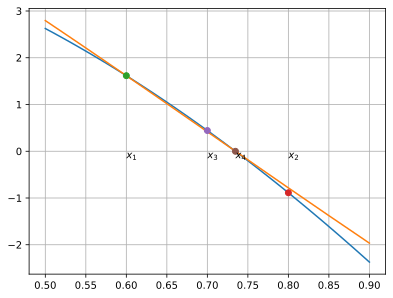

In [130]:
xmin = 0.5
xmax = 0.9
x = np.linspace(xmin, xmax, 200)
fx = func_06(x)
gx = eval_g_x(func_06, Q, x1, x)
plt.clf()
plt.plot(x, fx, label="f(x)")
plt.plot(x, gx, label="g(x)")
plt.plot([x1], [f1], marker="o"); plt.text(x1, -0.15, "$x_1$");
plt.plot([x2], [f2], marker="o"); plt.text(x2, -0.15, "$x_2$");
plt.plot([x3], [f3], marker="o"); plt.text(x3, -0.15, "$x_3$");
plt.plot([x4], [f4], marker="o"); plt.text(x4, -0.15, "$x_4$");
plt.grid();

In [132]:
f3, f4

(0.4430000000000005, -0.0010662811653121551)

## Implementasi Python untuk metode Ridder

In [140]:
def ridder(f, x1, x2, TOL=1.0e-10, NiterMax=100):

    assert TOL >= 0.0

    f1 = f(x1)
    if abs(f1) <= TOL:
        return x1, 0.0

    f2 = f(x2)
    if abs(f2) <= TOL:
        return x2, 0.0

    if f1*f2 > 0.0:
        raise RuntimeError("f(x1) dan f(x2) memiliki tanda yang sama")

    # Untuk menghitung error relatif
    x4 = 0.0
    x4_old = 0.0

    for i in range(1,NiterMax+1):

        x4_old = x4

        x3 = 0.5*(x1 + x2)
        f3 = f(x3)
        
        if abs(f3) <= TOL:
            print("TOL dicapai pada nilai tengah")
            return x3

        s = math.sqrt(f3**2 - f1*f2)
        if s == 0.0:
            raise RuntimeError("s bernilai 0")

        dx = (x3 - x1)*f3/s
        if (f1 - f2) < 0:
            dx = -dx

        # Aproksimasi akar
        x4 = x3 + dx
        f4 = f(x4)
        
        print("ridder: %5d %18.10f %15.5e" % (i, x4, abs(f4)))

        if abs(f4) <= TOL:
            print("")
            print("ridder: Konvergen setelah %d iterasi" % (i))
            return x4

        # Tentukan rentang baru x1 dan x2
        if f3*f4 > 0.0:
            if f1*f4 < 0.0:
                x2 = x4
                f2 = f4
            else:
                x1 = x4
                f1 = f4
        else:
            x1 = x3
            x2 = x4
            f1 = f3
            f2 = f4

    print("WARNING: Konvergensi tidak tercapai")
    return x4

## Contoh penggunaan `ridder`

In [142]:
xr = ridder(func_06, 0.1, 0.8)

ridder:     1       0.7393715665     6.25106e-02
ridder:     2       0.7346626703     7.73467e-04
ridder:     3       0.7346036702     2.12373e-06
ridder:     4       0.7346035079     1.38630e-09
ridder:     5       0.7346035078     2.17604e-13

ridder: Konvergen setelah 5 iterasi


# Metode Muller

Ingat bahwa metode secant mendapatkan estimasi akar dengan cara melakukan proyeksi garis lurus (persamaan linear) pada sumbu $x$ yang melalui dua nilai titik. Metode Muller menggunakan pendekatan yang sama, namun dengan memproyeksikan sebuah parabola (persamaan kuadrat) yang melalui tiga titik. Misalkan parabola tersebut memiliki persamaan sebagai berikut:

$$
f(x) = a(x - x_2)^2 + b(x - x_2) + c
$$

Kita ingin persamaan ini melewati tiga titik: $[x_0, f(x_0)]$, $[x_1, f(x_1)]$ dan $[x_2, f(x_2)]$ atau:

$$
f(x_0) = a(x_0 - x_2)^2 + b(x_0 - x_2) + c \\
f(x_1) = a(x_1 - x_2)^2 + b(x_1 - x_2) + c \\
f(x_2) = a(x_2 - x_2)^2 + b(x_2 - x_2) + c
$$

Koefisien $c$ tidak lain adalah nilai fungsi yang dievaluasi pada tebakan ketiga yaitu $f(x_2)$. Substitusi pada dua persamaan sebelumnya sehingga diperoleh:

$$
f(x_0) - f(x_2) = a(x_0 - x_2)^2 + b(x_0 - x_2) \\
f(x_1) - f(x_2) = a(x_1 - x_2)^2 + b(x_1 - x_2)
$$

Dengan definisi-definisi berikut:

$$
h_0 = x_1 - x_0 \\
h_1 = x_2 - x_1 \\
\delta_0 = \frac{f(x_1) - f(x_0)}{x_1 - x_0} \\
\delta_1 = \frac{f(x_2) - f(x_1)}{x_2 - x_1}
$$

diperoleh:

$$
\begin{align}
(h_0 + h_1)b - (h_0 + h_1)^2 a & = h_0 \delta_0 + h_1 \delta_1 \\
h_1 b - h_1^2 a & = h_{1} \delta_{1}
\end{align}
$$

yang dapat diselesaikan untuk mendapatkan nilai $a$ dan $b$:

$$
\begin{align}
a & = \frac{\delta_1 - \delta_0}{h_1 + h_0} \\
b & = ah_1 + \delta_1 \\
c & = f(x_2)
\end{align}
$$

Setelah diperoleh koefisien-koefisien untuk persamaan kuadrat kita dapat memperoleh akar-akar dari persamaan kuadrat:

$$
x_3 = x_2 + \frac{2c}{b \pm \sqrt{b^2 - 4ac}}
$$

Estimasi error:

$$
\epsilon_a = \left| \frac{x_3 -x_2}{x_3} \right|
$$

Persamaan ini akan menghasilkan sepasang akar. Pada Metode Muller, tanda dari akar dipilih agar sama dengan tanda dari $b$. Pilihan ini akan menghasilkan penyebut yang paling besar sehingga estimasi akar adalah yang paling dekat ke $x_2$. Ketika $x_3$ telah ditentukan proses akan diulangi sehingga perlu ada nilai yang dibuang.

- Jika hanya akar real yang ingin ditemukan, maka dua titik awal yang dipilih adalah yang paling dekat dengan estimasi akar baru $x_3$.
- Jika baik akar real dan kompleks yang ingin ditentukan, maka pendekatan sekuensial yang digunakan, yaitu: $x_1$, $x_2$, dan $x_3$ menggantikan $x_0$, $x_{1}$, dan $x_2$.

## Implementasi

In [161]:
def muller(f, x0, x1, x2, TOL=1e-10, NiterMax=100):
    
    if abs(f(x0)) <= TOL:
        print("abs f(x0) bernilai sangat kecil: ", abs(f(x0)))
        return x0

    if abs(f(x1)) <= TOL:
        print("abs f(x1) bernilai sangat kecil: ", abs(f(x1)))
        return x1

    if abs(f(x2)) <= TOL:
        print("abs f(x2 bernilai sangat kecil: ", abs(f(x2)))
        return x2
    
    for i in range(1,NiterMax+1):
        h0 = x1 - x0
        h1 = x2 - x1

        d0 = ( f(x1) - f(x0) ) / h0
        d1 = ( f(x2) - f(x1) ) / h1

        # Koefisien parabola
        a = (d1 - d0) / (h1 + h0)
        b = a*h1 + d1
        c = f(x2)

        D = math.sqrt(b*b - 4*a*c)
        if abs(b + D) > abs(b - D):
            denum = b + D
        else:
            denum = b - D

        dx_r = -2*c/denum
        x_r = x2 + dx_r

        print("Iter = %3d    x_r = %18.10f    %18.10e" % (i, x_r, abs(f(x_r))))

        if abs(f(x_r)) <= abs(TOL):
            print("muller: Konvergensi dicapat pada %d iterasi" % (i))
            return x_r
            break

        x0 = x1
        x1 = x2
        x2 = x_r
    
    return x_r

In [163]:
xroot = muller(func_01, -1.0, 0.0, 1.0)

Iter =   1    x_r =       0.2000000000      9.6000000000e-01
Iter =   2    x_r =       0.3722813233      2.0130033734e-01
Iter =   3    x_r =       0.4124470885      2.5068238403e-02
Iter =   4    x_r =       0.4181650573      2.8619083919e-04
Iter =   5    x_r =       0.4181005985      8.3486966229e-08
Iter =   6    x_r =       0.4181006173      3.4194869158e-14
muller: Konvergensi dicapat pada 6 iterasi


In [165]:
xroot = muller(func_02, 1.0, 2.0, 3.0)

Iter =   1    x_r =       4.8853518737      9.2432376752e+00
Iter =   2    x_r =       3.7870421412      2.5611679785e-01
Iter =   3    x_r =       3.7454858517      1.3548954957e-03
Iter =   4    x_r =       3.7452620983      2.4991644310e-07
Iter =   5    x_r =       3.7452621396      1.7763568394e-14
muller: Konvergensi dicapat pada 5 iterasi


# Menggunakan pustaka Python

Beberapa pustaka Python dapat digunakan untuk mencari akar persamaan nonlinear:

- `scipy.optimize.root`: akar persamaan nonlinear

- `numpy.roots`: untuk akar polinomial

In [166]:
import scipy.optimize

In [169]:
res = scipy.optimize.root(func_01, 1.0)
res.x[0]

0.41810061725378433

In [171]:
res = scipy.optimize.root(func_02, 1.0)
res.x[0]

1.598429539125761

# Latihan Soal

## Soal 1

Impedansi dari rangkaian paralel RLC dinyatakan oleh persamaan
$$
\frac{1}{Z} = \sqrt{\frac{1}{R^2} +
\left( \omega C - \frac{1}{\omega L} \right)^2 }
$$
Cari frekuensi angular w untuk Z = 75 ohm, R = 225 ohm, $C = 0.6\times10^{−6}$ F, and L = 0.5 H. Untuk metoda grafis kerjakan sampai ketelitian 2 angka dibelakang koma. (pentunjuk: akar berada di sekitar 160)

## Jawaban Soal 1

In [ ]:
def func_soal_01(omega):
    Z = 75.0
    R = 225.0
    C = 0.6e-6
    L = 0.5
    term1 = np.sqrt( 1/R**2 + (omega*C - 1/(omega*L))**2 )
    return term1 - 1/Z

In [ ]:
plt.clf()
omega = np.linspace(100,200,1000)
f = func_soal_01(omega)
plt.grid()
plt.plot(omega, f)

### Solusi dengan metode bisection

In [ ]:
omega_root = bisection(func_soal_01,150,170)

### Solusi dengan metode regula falsi

In [ ]:
omega_root = regula_falsi(func_soal_01,150,170)

### Solusi dengan metode secant

In [ ]:
omega_root = secant(func_soal_01, 150)

In [ ]:
func_soal_01(omega_root)

## Soal 6

Gaya $F$ yang bekerja antara partikel bermuatan $q$ dengan piringan bulat dengan jari-jari $R$ dan rapat muatan $Q$ diberikan oleh persamaan:
$$
F = \frac{Qq}{2\epsilon_{0}}\left(
1 - \frac{z}{\sqrt{z^2 + R^2}}
\right)
$$
dimana $\epsilon_{0} = 0.885 \times 10^{-12}$
$\mathrm{C}^{2}/(\mathrm{Nm}^{2})$
adalah konstanta permitivitas dan $z$ adalah jarak partikel terhadap piringan. Tentukan jarak $z$ jika $F = 0.3$ newton
$Q = 9.4 \times 10^{-6}\,\mathrm{C/m}^2$
$q = 2.4 \times 10^{-5}$C dan $R=0.1$ m.

## Jawaban Soal 6

In [143]:
def func_soal_06(z):
    F = 0.3
    Q = 9.4e-6
    q = 2.4e-5
    R = 0.1
    ϵ0 = 0.885e-12
    RHS = Q*q/(2*ϵ0)*(1 - z/np.sqrt(z**2 + R**2))
    return F - RHS

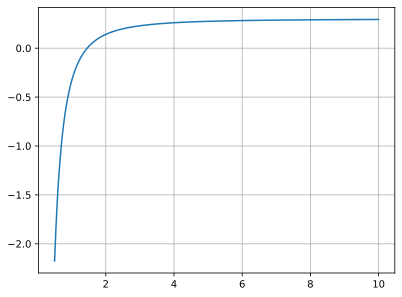

In [145]:
z = np.linspace(0.5,10.0,1000)
ff = func_soal_06(z)
plt.clf()
plt.plot(z, ff)
plt.grid();

In [147]:
xroot = bisection(func_soal_06, 0.5, 1.5)

Iter =     1, xr =       1.0000000000, abs(fxr) =     3.32548e-01
Iter =     2, xr =       1.2500000000, abs(fxr) =     1.05917e-01
Iter =     3, xr =       1.3750000000, abs(fxr) =     3.57467e-02
Iter =     4, xr =       1.4375000000, abs(fxr) =     7.28923e-03
Iter =     5, xr =       1.4687500000, abs(fxr) =     5.60301e-03
Iter =     6, xr =       1.4531250000, abs(fxr) =     7.39637e-04
Iter =     7, xr =       1.4609375000, abs(fxr) =     2.45701e-03
Iter =     8, xr =       1.4570312500, abs(fxr) =     8.65082e-04
Iter =     9, xr =       1.4550781250, abs(fxr) =     6.43303e-05
Iter =    10, xr =       1.4541015625, abs(fxr) =     3.37250e-04
Iter =    11, xr =       1.4545898438, abs(fxr) =     1.36359e-04
Iter =    12, xr =       1.4548339844, abs(fxr) =     3.59893e-05
Iter =    13, xr =       1.4549560547, abs(fxr) =     1.41768e-05
Iter =    14, xr =       1.4548950195, abs(fxr) =     1.09047e-05
Iter =    15, xr =       1.4549255371, abs(fxr) =     1.63643e-06
Iter =    

In [148]:
xroot = regula_falsi(func_soal_06, 0.5, 1.5)

Iter =     1, xr =       1.4919276117, abs(fxr) =     1.46486e-02
Iter =     2, xr =       1.4852921021, abs(fxr) =     1.21020e-02
Iter =     3, xr =       1.4798404998, abs(fxr) =     9.98413e-03
Iter =     4, xr =       1.4753634762, abs(fxr) =     8.22739e-03
Iter =     5, xr =       1.4716881019, abs(fxr) =     6.77326e-03
Iter =     6, xr =       1.4686717138, abs(fxr) =     5.57173e-03
Iter =     7, xr =       1.4661967529, abs(fxr) =     4.58035e-03
Iter =     8, xr =       1.4641664384, abs(fxr) =     3.76334e-03
Iter =     9, xr =       1.4625011583, abs(fxr) =     3.09069e-03
Iter =    10, xr =       1.4611354660, abs(fxr) =     2.53734e-03
Iter =    11, xr =       1.4600155888, abs(fxr) =     2.08244e-03
Iter =    12, xr =       1.4590973653, abs(fxr) =     1.70868e-03
Iter =    13, xr =       1.4583445403, abs(fxr) =     1.40171e-03
Iter =    14, xr =       1.4577273586, abs(fxr) =     1.14970e-03
Iter =    15, xr =       1.4572214057, abs(fxr) =     9.42872e-04
Iter =    

In [152]:
xroot = secant(func_soal_06, 2.0)

Iter =     1, x =       2.0000000000, abs(f(x))     1.40976e-01
Iter =     2, x =       1.1111653926, abs(f(x))     2.13039e-01
Iter =     3, x =       1.6460474493, abs(f(x))     6.54416e-02
Iter =     4, x =       1.5203525942, abs(f(x))     2.51847e-02
Iter =     5, x =       1.4417176842, abs(f(x))     5.50039e-03
Iter =     6, x =       1.4558131940, abs(f(x))     3.66074e-04
Iter =     7, x =       1.4549336185, abs(f(x))     4.95733e-06
Iter =     8, x =       1.4549215439, abs(f(x))     4.53620e-09
Iter =     9, x =       1.4549215549, abs(f(x))     6.98885e-14
Iterasi konvergen: akar ditemukan


In [153]:
xroot = ridder(func_soal_06, 0.5, 2.0)

ridder:     1       1.3908991274     2.81443e-02
ridder:     2       1.4574712109     1.04502e-03
ridder:     3       1.4549194097     8.81541e-07
ridder:     4       1.4549215549     1.15952e-12

ridder: Konvergen setelah 4 iterasi


# Latihan Chapra (7th Ed)

## Chapra 6.1

$$
f(x) = \sin(\sqrt{x}) - x
$$

Ubah menjadi:

$$
x = g(x) = \sin(\sqrt{x})
$$

In [172]:
def soal_chapra_6_1_g(x):
    return np.sin(np.sqrt(x))

In [173]:
xroot = fixed_point(soal_chapra_6_1_g, 0.5)

Iter =     1, x =       0.5000000000, g(x) =       0.6496369391 abs(x-g(x))     1.49637e-01
Iter =     2, x =       0.6496369391, g(x) =       0.7215237971 abs(x-g(x))     7.18869e-02
Iter =     3, x =       0.7215237971, g(x) =       0.7509011663 abs(x-g(x))     2.93774e-02
Iter =     4, x =       0.7509011663, g(x) =       0.7620968510 abs(x-g(x))     1.11957e-02
Iter =     5, x =       0.7620968510, g(x) =       0.7662481432 abs(x-g(x))     4.15129e-03
Iter =     6, x =       0.7662481432, g(x) =       0.7677716545 abs(x-g(x))     1.52351e-03
Iter =     7, x =       0.7677716545, g(x) =       0.7683286600 abs(x-g(x))     5.57006e-04
Iter =     8, x =       0.7683286600, g(x) =       0.7685320219 abs(x-g(x))     2.03362e-04
Iter =     9, x =       0.7685320219, g(x) =       0.7686062313 abs(x-g(x))     7.42094e-05
Iter =    10, x =       0.7686062313, g(x) =       0.7686333063 abs(x-g(x))     2.70750e-05
Iter =    11, x =       0.7686333063, g(x) =       0.7686431838 abs(x-g(x))     

## Chapra 6.7

$$
f(x) = \sin(x) + \cos(1 + x^2) - 1
$$

In [174]:
def soal_chapra_6_7(x):
    return np.sin(x) + np.cos(1 + x**2) - 1

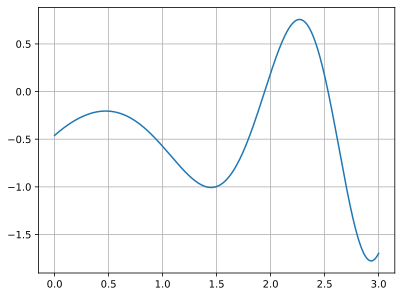

In [175]:
xmin = 0.0
xmax = 3.0
x = np.linspace(xmin, xmax, 500)
fx = soal_chapra_6_7(x)
plt.clf()
plt.plot(x, fx)
plt.grid();

In [187]:
xroot = secant(soal_chapra_6_7, 2.2)

Iter =     1, x =       2.2000000000, abs(f(x))     7.11887e-01
Iter =     2, x =       1.6479671833, abs(f(x))     8.42602e-01
Iter =     3, x =       1.9471934409, abs(f(x))     9.08562e-03
Iter =     4, x =       1.9440013594, abs(f(x))     2.13369e-03
Iter =     5, x =       1.9446084295, abs(f(x))     1.55976e-08
Iter =     6, x =       1.9446084251, abs(f(x))     4.24105e-14
Iterasi konvergen: akar ditemukan


In [180]:
xroot = secant(soal_chapra_6_7, 2.5)

Iter =     1, x =       2.5000000000, abs(f(x))     1.66396e-01
Iter =     2, x =       2.5337877357, abs(f(x))     8.51930e-03
Iter =     3, x =       2.5321420966, abs(f(x))     3.80288e-04
Iter =     4, x =       2.5322124163, abs(f(x))     7.36420e-07
Iter =     5, x =       2.5322125527, abs(f(x))     6.41720e-11
Iterasi konvergen: akar ditemukan


In [182]:
xroot = regula_falsi(soal_chapra_6_7, 1.5, 2.1)

Iter =     1, xr =       1.8980613711, abs(fxr) =     1.62607e-01
Iter =     2, xr =       1.9472028724, abs(fxr) =     9.11876e-03
Iter =     3, xr =       1.9445934190, abs(fxr) =     5.27431e-05
Iter =     4, xr =       1.9446084253, abs(fxr) =     6.21214e-10
Iterasi konvergen: akar ditemukan
